<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Multi_data_sets_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection and Cleaning


* Data Collection

In [ ]:

import pandas as pd
import numpy as np
import requests
import io
import openpyxl
import xlrd
import datetime
import os
from google.colab import drive

# Saving to multiple CSV files
file_paths = [
    '/content/DACT_Strict-Dataset.csv',
    '/content/DACT_Easy-Dataset.csv',
    '/content/Motor_Vehicle_Deaths_and_Rates.xlsx',
    '/content/Motor_Vehicle_Collisions_-_Crashes.csv',
    '/content/NTAD_Fatality_Analysis_Reporting_System_2021_Accidents.csv',
    '/content/NTAD_Fatality_Analysis_Reporting_System_2021_PerAux.csv',
    '/content/NTAD_Fatality_Analysis_Reporting_System_2022_VehAux.csv',
    '/content/Road_Accident_Data.xlsx',
    '/content/The_Smart_Road_Safety_Project_Dataset.csv',
    '/content/US_Accidents_Dec21_Updated.csv',
    '/content/state_abbrev.csv',
    '/content/stations.csv',
    '/content/synthetic_automobile_crash_data_india.csv'
]

for file_path in file_paths:
    accidents_df.to_csv(file_path, index=False)


* Data Cleaning

In [ ]:
dataframes = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)
print(combined_df.head())



   accident_id                 date      time    location weather  \
0            1  2022-01-01 00:00:00  06:00:00  Location_C   Clear   
1            2  2022-01-01 01:00:00  19:00:00  Location_A   Snowy   
2            3  2022-01-01 02:00:00  14:00:00  Location_B   Snowy   
3            4  2022-01-01 03:00:00  10:00:00  Location_B   Clear   
4            5  2022-01-01 04:00:00  07:00:00  Location_B   Snowy   

  road_condition vehicle_type severity  speed  driver_age driver_gender  \
0            Wet          Car    Minor     92          66          Male   
1            Wet        Truck    Fatal     64          66          Male   
2            Dry   Motorcycle    Major     64          41          Male   
3            Icy   Motorcycle    Fatal     48          64          Male   
4            Wet        Truck    Minor     49          24        Female   

   pothole_detected  free_parking_space  stolen_vehicle_detected  \
0                 1                   0                        0  

In [ ]:
accidents_df = pd.DataFrame(data)
accidents_df.to_csv('enhanced_synthetic_accident_data.csv', index=False)

# Load the data
df = pd.read_csv('enhanced_synthetic_accident_data.csv')

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert date and time to datetime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'].astype(str))
df.drop(['date', 'time'], axis=1, inplace=True)

<ipython-input-27-63e9e16d477f>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'].astype(str))


In [ ]:
combined_df.drop_duplicates(inplace=True)
combined_df.fillna(method='ffill', inplace=True)  # Example of filling missing values
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   accident_id              1000 non-null   int64         
 1   date                     1000 non-null   datetime64[ns]
 2   time                     1000 non-null   object        
 3   location                 1000 non-null   object        
 4   weather                  1000 non-null   object        
 5   road_condition           1000 non-null   object        
 6   vehicle_type             1000 non-null   object        
 7   severity                 1000 non-null   object        
 8   speed                    1000 non-null   int64         
 9   driver_age               1000 non-null   int64         
 10  driver_gender            1000 non-null   object        
 11  pothole_detected         1000 non-null   int64         
 12  free_parking_space       1000 non-null  

# 2. Exploratory Data Analysis (EDA):

       accident_id       speed   driver_age  pothole_detected  \
count  1000.000000  1000.00000  1000.000000       1000.000000   
mean    500.500000    64.65000    48.264000          0.509000   
min       1.000000    30.00000    18.000000          0.000000   
25%     250.750000    47.00000    33.000000          0.000000   
50%     500.500000    65.00000    47.000000          1.000000   
75%     750.250000    82.00000    64.000000          1.000000   
max    1000.000000    99.00000    79.000000          1.000000   
std     288.819436    20.00234    17.839017          0.500169   

       free_parking_space  stolen_vehicle_detected  damaged_road_sign  \
count         1000.000000              1000.000000        1000.000000   
mean             0.502000                 0.493000           0.465000   
min              0.000000                 0.000000           0.000000   
25%              0.000000                 0.000000           0.000000   
50%              1.000000                 0.00000

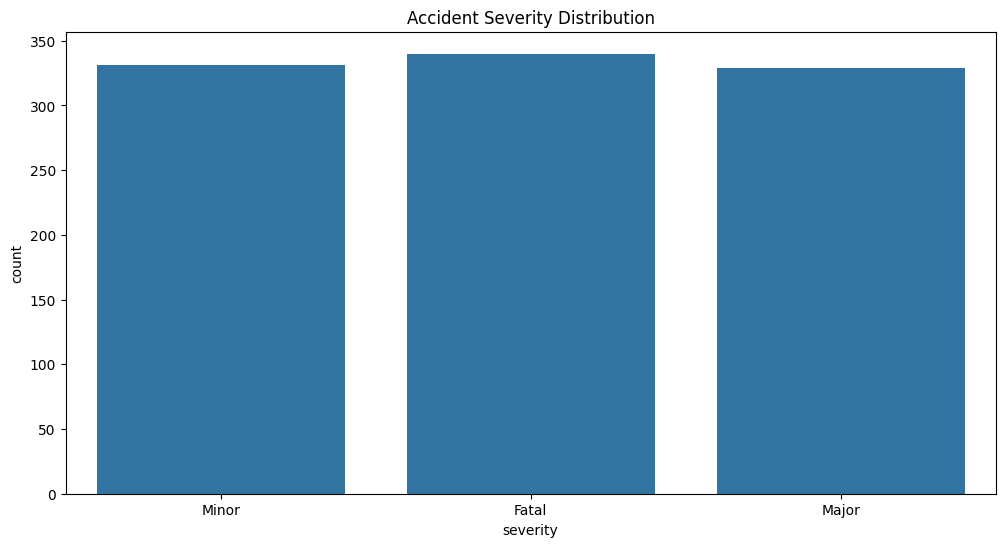

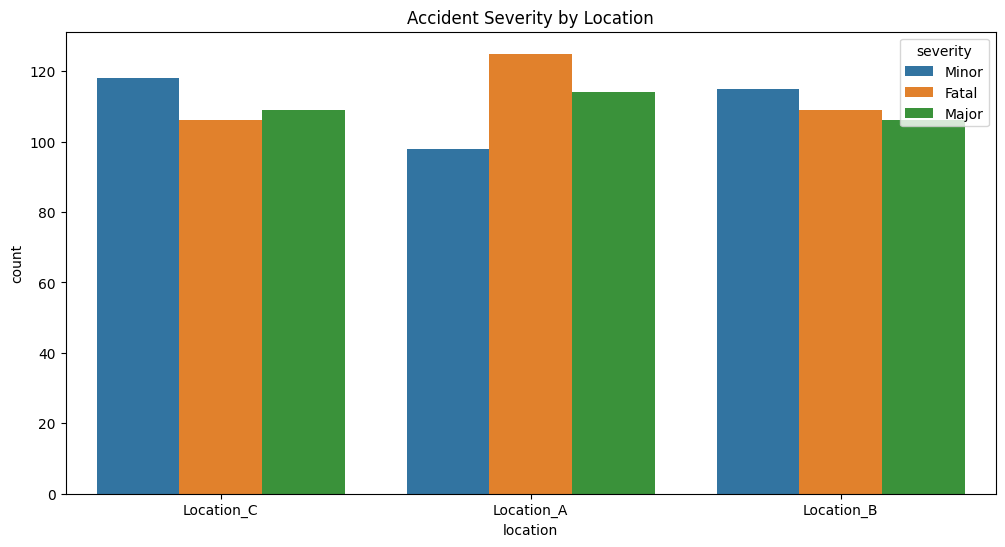

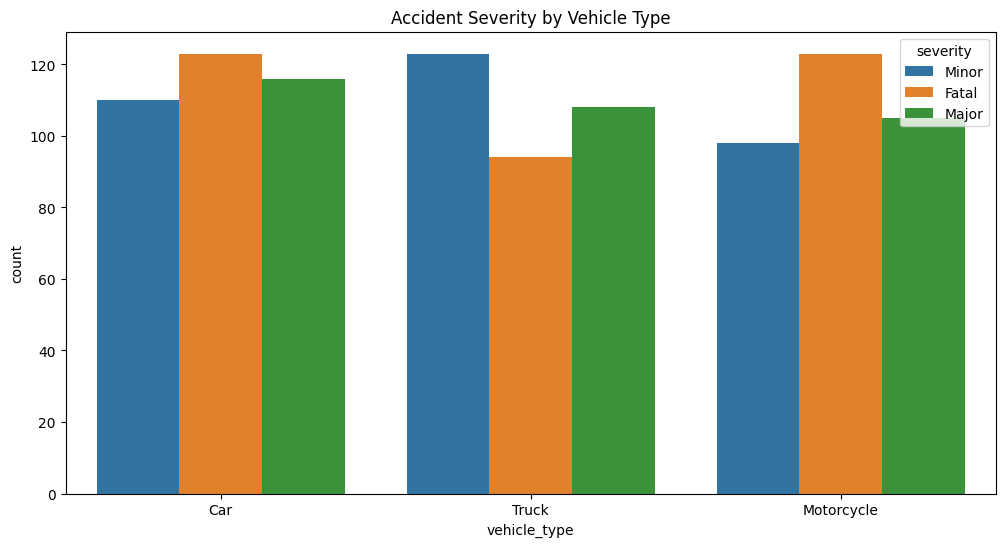

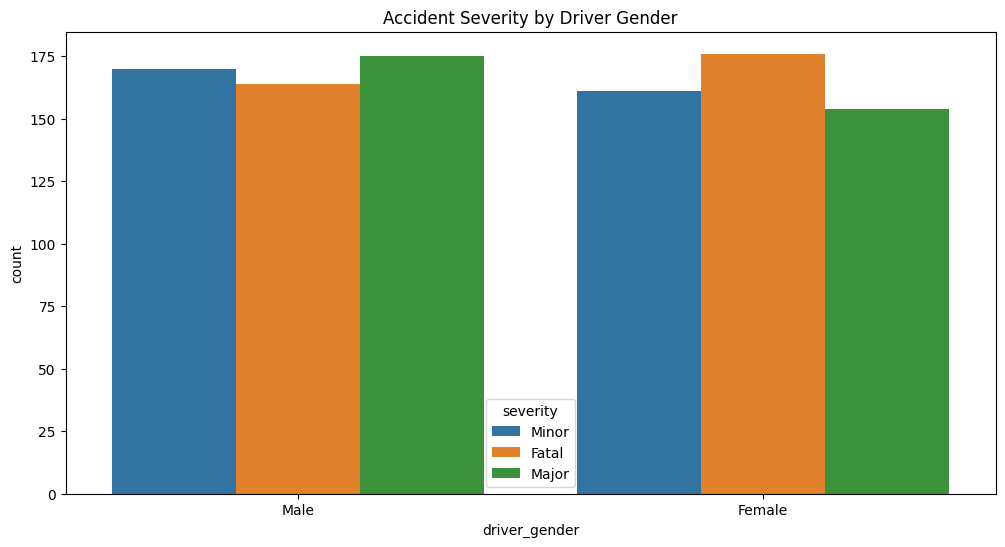

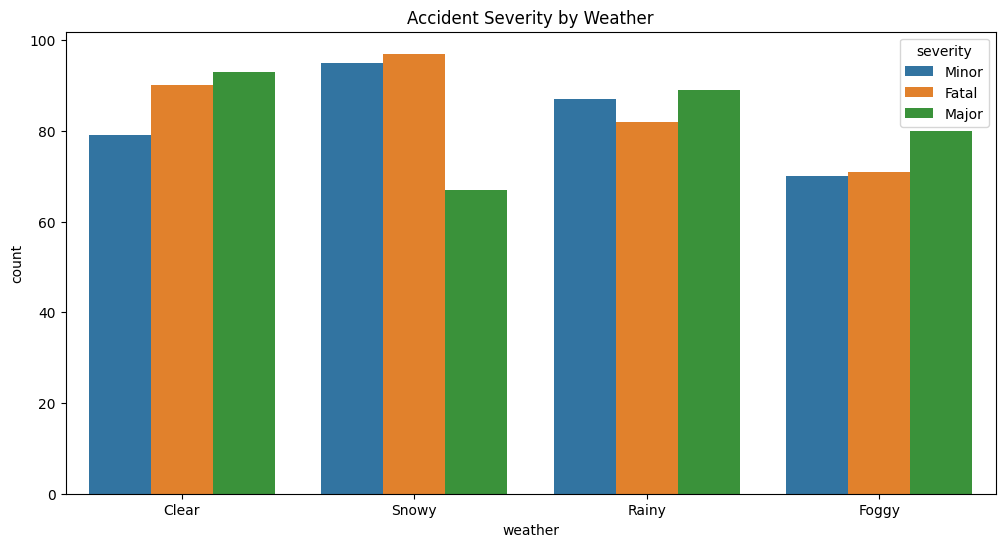

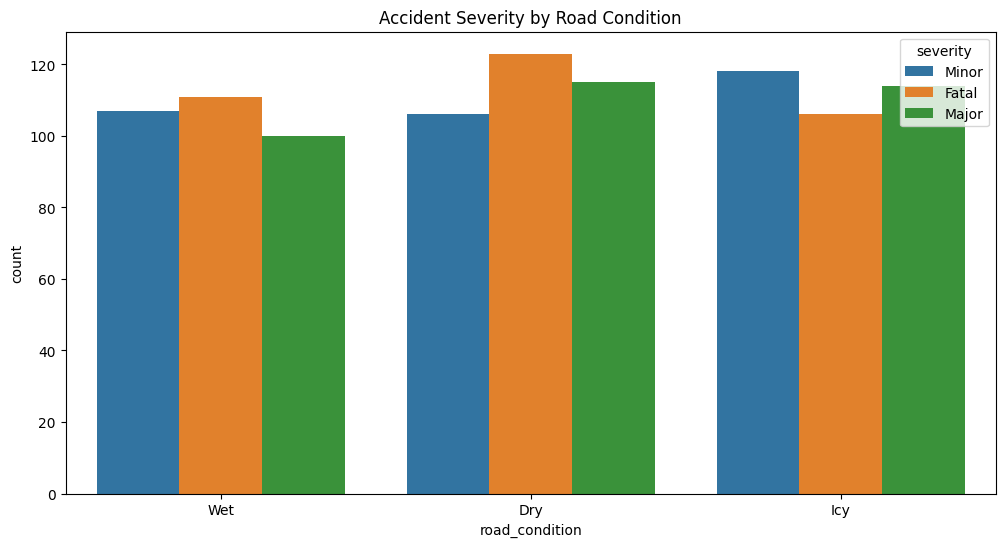

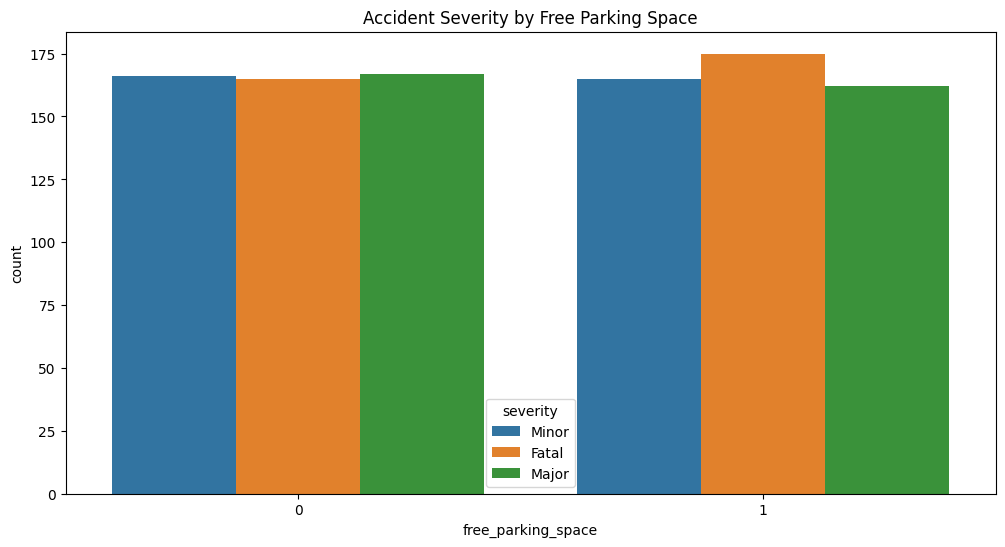

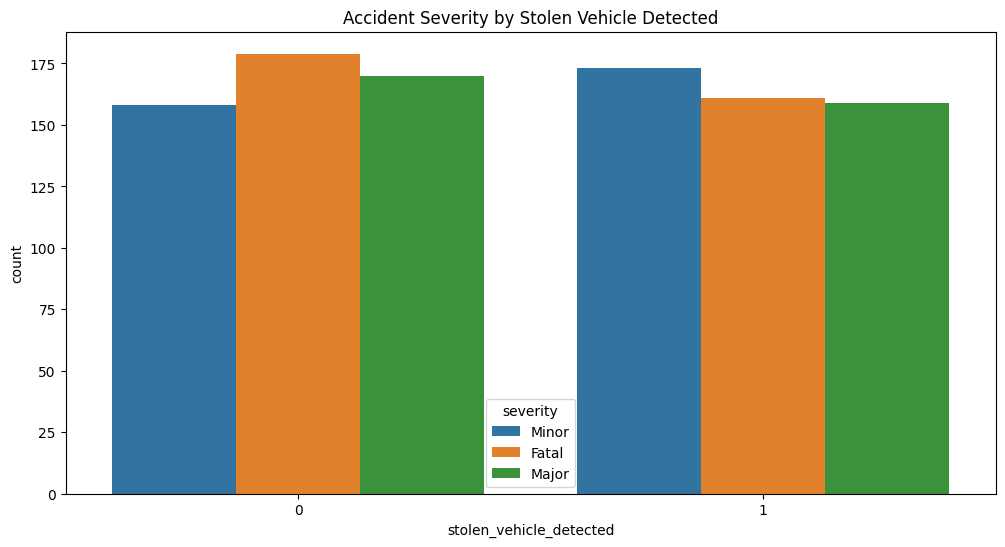

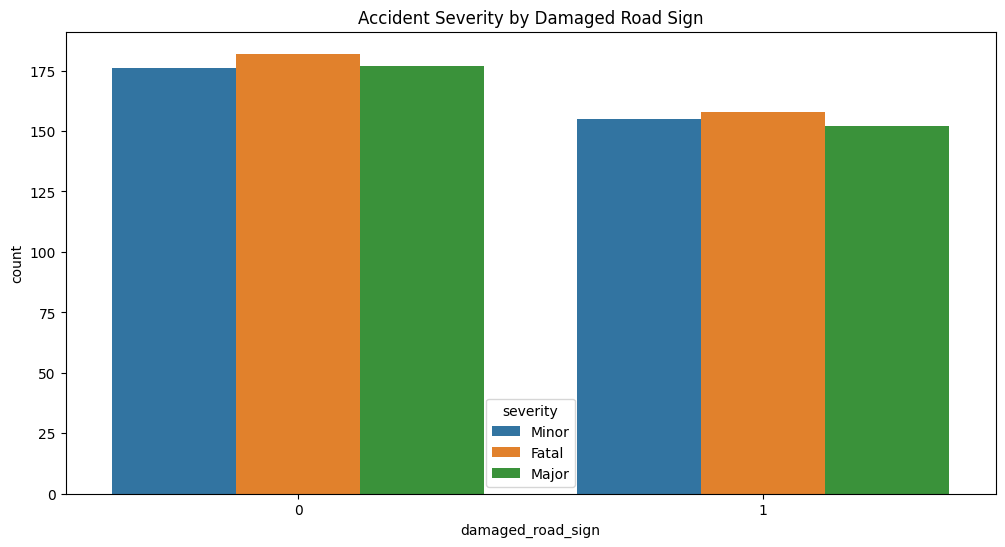

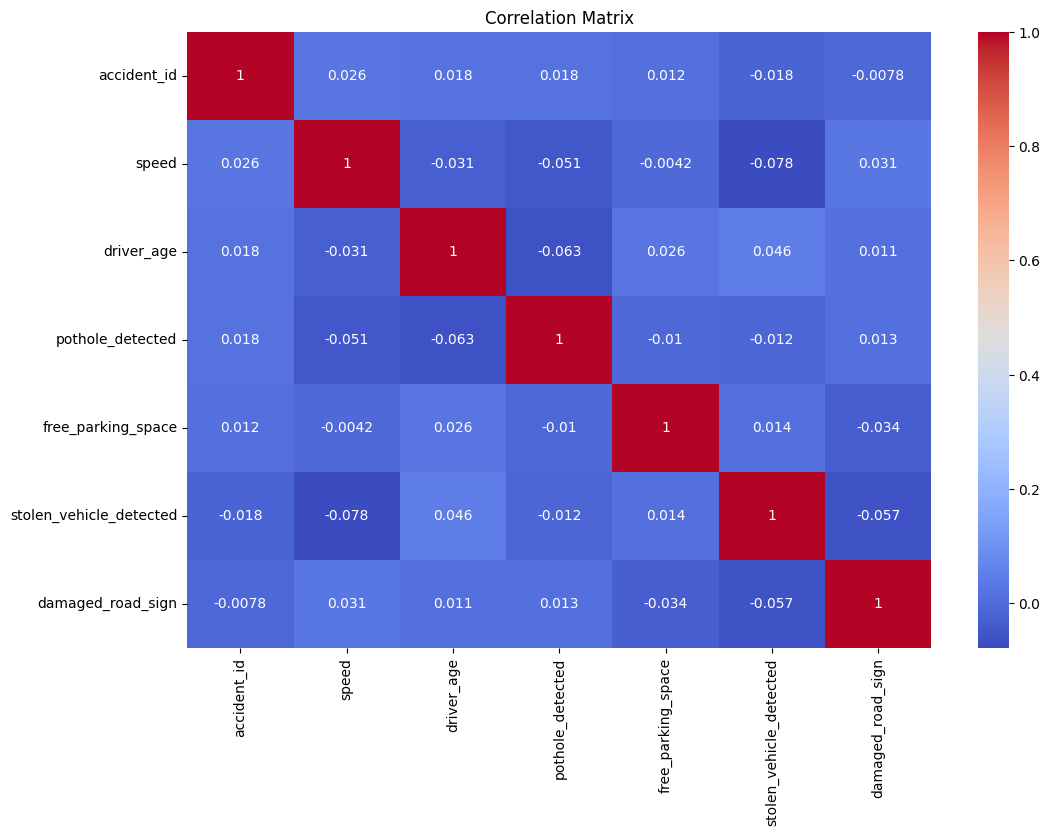

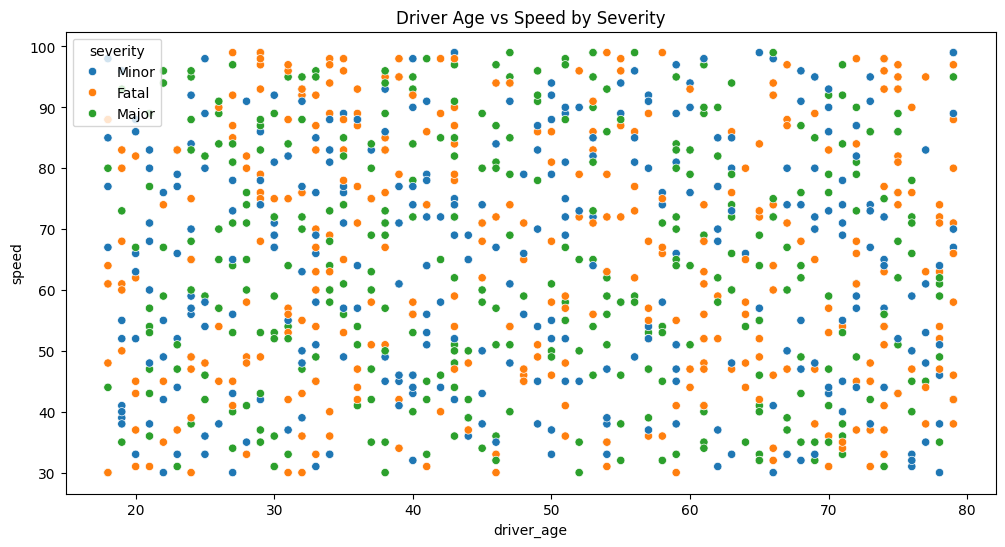

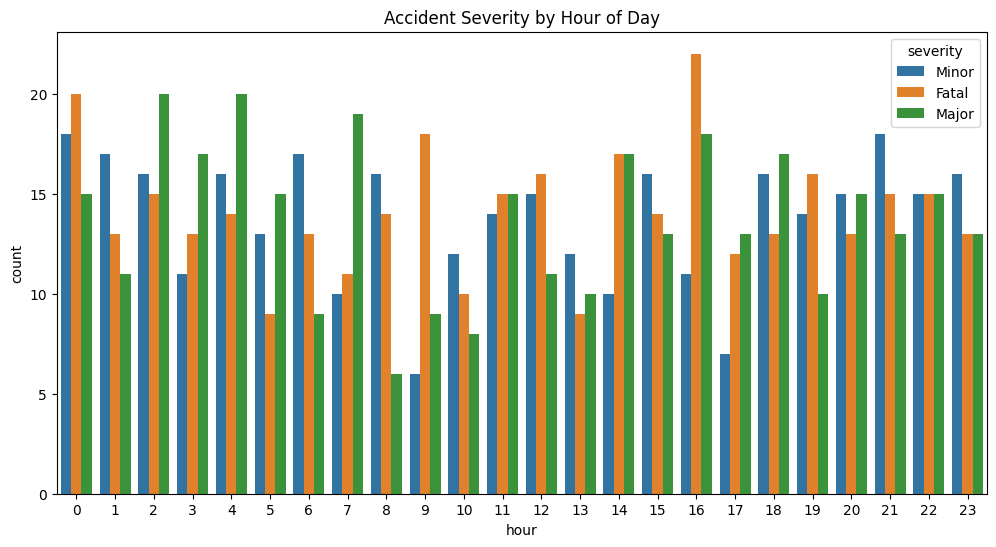

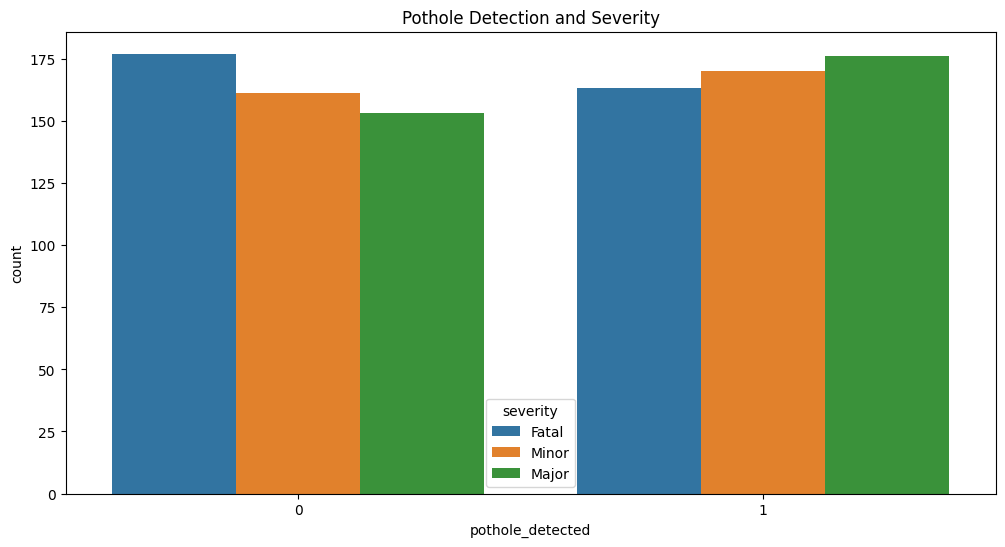

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Data distribution
print(df.describe(include='object'))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
print(numeric_df.corr())


# Accident severity distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()

# Accident severity by location
plt.figure(figsize=(12, 6))
sns.countplot(x='location', hue='severity', data=df)
plt.title('Accident Severity by Location')
plt.show()

# Accident severity by vehicle type
plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type', hue='severity', data=df)
plt.title('Accident Severity by Vehicle Type')
plt.show()

# Accident severity by driver gender
plt.figure(figsize=(12, 6))
sns.countplot(x='driver_gender', hue='severity', data=df)
plt.title('Accident Severity by Driver Gender')
plt.show()

# Accident severity by weather
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', hue='severity', data=df)
plt.title('Accident Severity by Weather')
plt.show()

# Accident severity by road condition
plt.figure(figsize=(12, 6))
sns.countplot(x='road_condition', hue='severity', data=df)
plt.title('Accident Severity by Road Condition')
plt.show()

# Accident severity by free parking space
plt.figure(figsize=(12, 6))
sns.countplot(x='free_parking_space', hue='severity', data=df)
plt.title('Accident Severity by Free Parking Space')
plt.show()

# Accident severity by stolen vehicle detected
plt.figure(figsize=(12, 6))
sns.countplot(x='stolen_vehicle_detected', hue='severity', data=df)
plt.title('Accident Severity by Stolen Vehicle Detected')
plt.show()

# Accident severity by damaged road sign
plt.figure(figsize=(12, 6))
sns.countplot(x='damaged_road_sign', hue='severity', data=df)
plt.title('Accident Severity by Damaged Road Sign')
plt.show()


# Correlation matrix
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Driver age vs speed by severity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='driver_age', y='speed', hue='severity', data=df)
plt.title('Driver Age vs Speed by Severity')
plt.show()

# Time of day vs severity
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='severity', data=df)
plt.title('Accident Severity by Hour of Day')
plt.show()

# Pothole detection distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='pothole_detected', hue='severity', data=df)
plt.title('Pothole Detection and Severity')
plt.show()


# 3. Feature Engineering:


In [ ]:
# Feature engineering for time of day
df['hour'] = df['datetime'].dt.hour
df['is_night'] = df['hour'].apply(lambda x: 1 if x >= 20 or x <= 6 else 0)

# Simplifying weather and road condition categories
df['bad_weather'] = df['weather'].apply(lambda x: 1 if x in ['Rainy', 'Foggy', 'Snowy'] else 0)
df['bad_road'] = df['road_condition'].apply(lambda x: 1 if x in ['Wet', 'Icy'] else 0)

# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['location', 'vehicle_type', 'driver_gender'], drop_first=True)

# Drop unused columns
df.drop(['weather', 'road_condition', 'datetime'], axis=1, inplace=True)


# 4. Machine Learning:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop(['accident_id', 'severity'], axis=1)
y = df['severity'].apply(lambda x: 2 if x == 'Fatal' else (1 if x == 'Major' else 0))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)

# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions and evaluation
rf_y_pred = rf_clf.predict(X_test)
gb_y_pred = gb_clf.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

print("Gradient Boosting Classifier:")
print(classification_report(y_test, gb_y_pred))
print(confusion_matrix(y_test, gb_y_pred))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.37      0.34      0.36        99
           1       0.33      0.28      0.30       102
           2       0.33      0.39      0.36        99

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.34      0.34       300

[[34 27 38]
 [31 29 42]
 [27 33 39]]
Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.37      0.34      0.35        99
           1       0.39      0.41      0.40       102
           2       0.35      0.35      0.35        99

    accuracy                           0.37       300
   macro avg       0.37      0.37      0.37       300
weighted avg       0.37      0.37      0.37       300

[[34 31 34]
 [30 42 30]
 [29 35 35]]


# 5. Hyperparameter Tuning:


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and evaluation for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_clf = grid_search_rf.best_estimator_
rf_y_pred = best_rf_clf.predict(X_test)
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and evaluation for Gradient Boosting
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb_clf = grid_search_gb.best_estimator_
gb_y_pred = best_gb_clf.predict(X_test)
print(classification_report(y_test, gb_y_pred))
print(confusion_matrix(y_test, gb_y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.34      0.33      0.34        99
           1       0.32      0.25      0.28       102
           2       0.35      0.43      0.39        99

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.34      0.34       300

[[33 25 41]
 [37 26 39]
 [26 30 43]]
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.34      0.34      0.34        99
           1       0.38      0.37      0.37       102
           2       0.38      0.37      0.38        99

    accuracy       

# 6. Deployment with Flask:


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model
model = best_rf_clf

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = pd.DataFrame([data])
    input_data = pd.get_dummies(input_data, columns=['location', 'vehicle_type', 'driver_gender'], drop_first=True)
    input_data = input_data.reindex(columns=X.columns, fill_value=0)  # Ensure same columns as training data
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [2]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.8 MB/s eta 0:00:00


# 7. Visualization with Dash:


In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd


app = dash.Dash(__name__)

# Sample data for visualization (replace with your actual DataFrame)
df_example = pd.DataFrame({
    'severity': ['Minor', 'Major', 'Fatal', 'Minor', 'Major'],
    'driver_age': [25, 45, 35, 50, 40],
    'speed': [60, 80, 70, 90, 75]
})

app.layout = html.Div([
    html.H1('Smart Road Safety Dashboard'),
    dcc.Graph(id='severity-distribution', figure={
        'data': [{'x': df_example['severity'].value_counts().index, 'y': df_example['severity'].value_counts().values, 'type': 'bar'}],
        'layout': {'title': 'Accident Severity Distribution'}
    }),
    dcc.Graph(id='age-speed-scatter', figure={
        'data': [{'x': df_example['driver_age'], 'y': df_example['speed'], 'mode': 'markers', 'text': df_example['severity']}],
        'layout': {'title': 'Driver Age vs Speed by Severity'}
    })
])

if __name__ == '__main__':
    app.run_server(debug=True)




<IPython.core.display.Javascript object>